In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv',encoding='latin1')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [4]:
test_df.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN


In [82]:
test_df['text']=test_df['TRANS_CONV_TEXT']

In [83]:
test_df['text'].head(20)

0     Baby Slice, the son of the late Kimbo Slice, h...
1     <p><font face="sans-serif" size="3">I have had...
2     Previously, sodium-glucose cotransporter-2 (SG...
3     Hello. I suffer from congestive heart failure ...
4     A daily dose of vitamin D3 improves heart func...
5     "reuters.com A stem cell therapy developed by ...
6     Sorry, I ran out of credit http://www.buffaloi...
7     The sun will come out tomorrow....But for peop...
8                      Pathophysiology of Heart failure
9     ( http://blog.zandcell.com/vericel-stem-cell-t...
10    There's no autopsy back yet. It's extremely ir...
11    By Michelle Andrews Kaiser Health News Althoug...
12    I am the same - i cant cope anymore sat every ...
13    Natalie Cole Remembered at Grammys ? But Witho...
14    "  Every American should have the right to hea...
15    I was told by one hospital that I had an enlar...
16    >>6031646 Spironolactone increases the amount ...
17    Hispanics are more likely to have problems

In [104]:
train_df['text']=train_df['TRANS_CONV_TEXT']

In [8]:
train_df.head(10)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,EpsteinI don't disagree with you in principle....
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,Enlarged Heart.Thread Enlarged HeartI am alway...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,Queen Latifah Joins American Heart Association...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,BulaemiaI am 17 and I have been throwing up fo...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,DIY Silver interconnects and RCAs???Quote: Ori...
5,FORUMS,forum.cyclinguk.org,http://forum.cyclinguk.org/viewtopic.php?f=24&...,4/6/2016,5:50:00,4/6/2016 15:20,Personal Question,Theres a discussion about recumbent power on B...,0,Personal QuestionTheres a discussion about rec...
6,FORUMS,www.reddit.com,https://www.reddit.com/r/todayilearned/comment...,5/2/2016,0.047916667,42492.44375,TIL that CVS took a $2 billion hit to annual s...,Of course! I just got diagnosed with congestiv...,1,TIL that CVS took a $2 billion hit to annual s...
7,BLOG,http://quranfruitz.blogspot.com,http://quranfruitz.blogspot.com/2016/02/causes...,2/28/2016,3:20:00,2/28/2016 13:50,Causes of Low Blood Pressure(Hypo tension),Blood pressure is a measurement of the pressur...,0,Causes of Low Blood Pressure(Hypo tension)Bloo...
8,FORUMS,hmnews.org,http://hmnews.org/health-care-news/cluster8641...,6/15/2016,17:16:00,6/16/2016 2:46,Sleep disorders may predict heart events after...,Other Sleep disorders may predict heart events...,0,Sleep disorders may predict heart events after...
9,FORUMS,www.cafepharma.com,http://www.cafepharma.com/boards/threads/nomin...,4/29/2016,23:46:00,4/30/2016 9:16,Nominations for worst manager at Novartis,worse manager ever??? LS out of Richmond. Ugh!...,0,Nominations for worst manager at Novartisworse...


In [9]:
train_df['text'][2]

'Queen Latifah Joins American Heart Association\'s "Red Steps" CampaignAxelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Queen Latifah is taking matters to heart, literally. The Emmy and Grammy winner has joined forces with the American Heart Association for its Red Steps campaign. The idea is for people to post photos of themselves taking steps while wearing red socks, to become more physically active and raise awareness of the risks and symptoms of heart failure. The goal is six million ?red steps,? in recognition of the nearly six million Americans living with heart failure For Latifah, born Dana Owens, the effort is personal. Her mother, Rita Owens, suffers from scleroderma, an incurable autoimmune disease that has caused scar tissue build up in her lungs. The 66-year-old former schoolteacher also has pulmonary hypertension, which impacts her ability to breathe. ?It\'s just a way for us to show support for all of those people who are dealing with the condition and those who care for them

In [10]:
import string
import re

In [11]:
train_df['text']=train_df['text'].str.replace('\d+','').str.replace('?','').str.replace('.','')
train_df['text'].head(20)

0     EpsteinI don't disagree with you in principle ...
1     Enlarged HeartThread Enlarged HeartI am always...
2     Queen Latifah Joins American Heart Association...
3     BulaemiaI am  and I have been throwing up for ...
4     DIY Silver interconnects and RCAsQuote: Origin...
5     Personal QuestionTheres a discussion about rec...
6     TIL that CVS took a $ billion hit to annual sa...
7     Causes of Low Blood Pressure(Hypo tension)Bloo...
8     Sleep disorders may predict heart events after...
9     Nominations for worst manager at Novartisworse...
10                                                  NaN
11    Comment on This Low Blood Pressure Diet is Ter...
12    Blood Pressure Monitoring and Testing Market t...
13    How Much Tax Can a Tax Man Tax if a Tax Man Ca...
14    () Now is when doves cry :(Russ : So another a...
15    Do-It-Yourself Blood Pressure Checks May Help ...
16    How big is the ALS market  Anybody !that's not...
17    Former First Lady Nancy Reagan Dies At  In

In [84]:
test_df['text']=test_df['text'].str.replace('\d+','').str.replace('?','').str.replace('.','')
test_df['text'].head(20)

0     Baby Slice, the son of the late Kimbo Slice, h...
1     <p><font face="sans-serif" size="">I have had ...
2     Previously, sodium-glucose cotransporter- (SGL...
3     Hello I suffer from congestive heart failure d...
4     A daily dose of vitamin D improves heart funct...
5     "reuterscom A stem cell therapy developed by V...
6     Sorry, I ran out of credit http://wwwbuffaloim...
7     The sun will come out tomorrowBut for people w...
8                      Pathophysiology of Heart failure
9     ( http://blogzandcellcom/vericel-stem-cell-the...
10    There's no autopsy back yet It's extremely irr...
11    By Michelle Andrews Kaiser Health News Althoug...
12    I am the same - i cant cope anymore sat every ...
13    Natalie Cole Remembered at Grammys  But Withou...
14    "  Every American should have the right to hea...
15    I was told by one hospital that I had an enlar...
16    >> Spironolactone increases the amount of pota...
17    Hispanics are more likely to have problems

In [13]:
train_df['text'][2]

'Queen Latifah Joins American Heart Association\'s "Red Steps" CampaignAxelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Queen Latifah is taking matters to heart, literally The Emmy and Grammy winner has joined forces with the American Heart Association for its Red Steps campaign The idea is for people to post photos of themselves taking steps while wearing red socks, to become more physically active and raise awareness of the risks and symptoms of heart failure The goal is six million red steps, in recognition of the nearly six million Americans living with heart failure For Latifah, born Dana Owens, the effort is personal Her mother, Rita Owens, suffers from scleroderma, an incurable autoimmune disease that has caused scar tissue build up in her lungs The -year-old former schoolteacher also has pulmonary hypertension, which impacts her ability to breathe It\'s just a way for us to show support for all of those people who are dealing with the condition and those who care for them, Latifah t

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 10 columns):
Source             1157 non-null object
Host               1098 non-null object
Link               1157 non-null object
Date(ET)           1157 non-null object
Time(ET)           1157 non-null object
time(GMT)          996 non-null object
Title              941 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1157 non-null int64
text               940 non-null object
dtypes: int64(1), object(9)
memory usage: 90.5+ KB


In [15]:
#test_df.info()

In [16]:
train_df.isnull().sum()

Source               0
Host                59
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)          161
Title              216
TRANS_CONV_TEXT      1
Patient_Tag          0
text               217
dtype: int64

In [85]:
test_df.isnull().sum()

Index                0
Source               0
Host                30
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)           91
Title              117
TRANS_CONV_TEXT      0
Unnamed: 9         570
text                 0
dtype: int64

In [105]:
new_train_df = train_df

In [106]:
new_train_df=new_train_df.drop(new_train_df.index[841])

In [107]:
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1156
Data columns (total 10 columns):
Source             1156 non-null object
Host               1097 non-null object
Link               1156 non-null object
Date(ET)           1156 non-null object
Time(ET)           1156 non-null object
time(GMT)          995 non-null object
Title              940 non-null object
TRANS_CONV_TEXT    1156 non-null object
Patient_Tag        1156 non-null int64
text               1156 non-null object
dtypes: int64(1), object(9)
memory usage: 99.3+ KB


In [108]:
new_train_df.isnull().sum()

Source               0
Host                59
Link                 0
Date(ET)             0
Time(ET)             0
time(GMT)          161
Title              216
TRANS_CONV_TEXT      0
Patient_Tag          0
text                 0
dtype: int64

In [109]:
def remove_punctuation(txt):
    no_punct=''.join([c for c in txt if c not in string.punctuation])
    return no_punct

In [110]:
new_train_df['text']=new_train_df['text'].apply(lambda x: remove_punctuation(x))
new_train_df['text'].head()

0    I dont disagree with you in principle Im just ...
1    I am always dizzy I get dizzy standing up so I...
2    AxelleBauerGriffinFilmMagicNEW YORK  Queen Lat...
3    I am 17 and I have been throwing up for about ...
4    Quote Originally Posted by Boyan Silyavski Wak...
Name: text, dtype: object

In [111]:
test_df['text']=test_df['text'].apply(lambda x: remove_punctuation(x))
test_df['text'].head()

0    baby slice son late kimbo slice signed profess...
1    pfont facesansserif sizei silicone salinefille...
2    previously sodiumglucose cotransporter sglt in...
3    hello suffer congestive heart failure due mi i...
4    daily dose vitamin improves heart function peo...
Name: text, dtype: object

In [112]:
#print(tokenizer.tokenize('it\'s something that we as a family like to share with other people because realize that by her talking about some of her medical issues, a lot of people are reaching out and saying \'Me too\' The rapper turned actress says the campaign has also helped her get healthy I am n'))

In [113]:
import nltk

In [114]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

In [115]:
new_train_df['text']=new_train_df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
new_train_df['text'].head()

0    [i, dont, disagree, with, you, in, principle, ...
1    [i, am, always, dizzy, i, get, dizzy, standing...
2    [axellebauergriffinfilmmagicnew, york, queen, ...
3    [i, am, 17, and, i, have, been, throwing, up, ...
4    [quote, originally, posted, by, boyan, silyavs...
Name: text, dtype: object

In [116]:
test_df['text']=test_df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
test_df['text'].head()

0    [baby, slice, son, late, kimbo, slice, signed,...
1    [pfont, facesansserif, sizei, silicone, saline...
2    [previously, sodiumglucose, cotransporter, sgl...
3    [hello, suffer, congestive, heart, failure, du...
4    [daily, dose, vitamin, improves, heart, functi...
Name: text, dtype: object

In [117]:
from nltk.corpus import stopwords

In [118]:
def remove_stopwords(txt):
    words=[w for w in txt if w not in stopwords.words('english')]
    return words

In [119]:
new_train_df['text']=new_train_df['text'].apply(lambda x: remove_stopwords(x))
new_train_df['text'].head()

0    [dont, disagree, principle, im, saying, entres...
1    [always, dizzy, get, dizzy, standing, made, ge...
2    [axellebauergriffinfilmmagicnew, york, queen, ...
3    [17, throwing, year, nowalmost, everyday, thro...
4    [quote, originally, posted, boyan, silyavski, ...
Name: text, dtype: object

In [120]:
test_df['text']=test_df['text'].apply(lambda x: remove_stopwords(x))
test_df['text'].head()

0    [baby, slice, son, late, kimbo, slice, signed,...
1    [pfont, facesansserif, sizei, silicone, saline...
2    [previously, sodiumglucose, cotransporter, sgl...
3    [hello, suffer, congestive, heart, failure, du...
4    [daily, dose, vitamin, improves, heart, functi...
Name: text, dtype: object

In [121]:
#train_df.to_csv('file_name.csv')

In [122]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [123]:
def word_lemmatizer(txt):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in txt])
    return lem_text

In [124]:
new_train_df['text']=new_train_df['text'].apply(lambda x: word_lemmatizer(x))

In [125]:
test_df['text']=test_df['text'].apply(lambda x: word_lemmatizer(x))

In [126]:
new_train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,dont disagree principle im saying entresto maj...
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,always dizzy get dizzy standing made get slow ...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,axellebauergriffinfilmmagicnew york queen lati...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,17 throwing year nowalmost everyday thrown blo...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,quote originally posted boyan silyavski wake f...


In [127]:
test_df.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9,text
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN,baby slice son late kimbo slice signed profess...
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN,pfont facesansserif sizei silicone salinefille...
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN,previously sodiumglucose cotransporter sglt in...
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN,hello suffer congestive heart failure due mi i...
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN,daily dose vitamin improves heart function peo...


In [128]:
#from nltk.stem import PorterStemmer
#stemmer=PorterStemmer()
#def word_stemmer(text):
#    stem_text=" ".join([stemmer.stem(i) for i in text])
#    return stem_text

#new_train_df['text']=new_train_df['text'].apply(lambda x: word_stemmer(x))
#new_train_df['text'].head(20)

In [129]:
new_train_df.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,text
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,dont disagree principle im saying entresto maj...
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,always dizzy get dizzy standing made get slow ...
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,axellebauergriffinfilmmagicnew york queen lati...
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,17 throwing year nowalmost everyday thrown blo...
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,quote originally posted boyan silyavski wake f...


In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [131]:
y=new_train_df['Patient_Tag']

In [132]:
x_train,x_test,y_train,y_test=train_test_split(new_train_df['text'],y,random_state=42,test_size=0.2)

In [133]:
test_csv_x=test_df['text'].values

In [134]:
test_csv_x.shape

(571,)

In [135]:
x_train.shape

(924,)

In [136]:
y_train.shape

(924,)

In [137]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

In [138]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train.values)

In [139]:
tfidf_train.shape

(924, 21316)

In [140]:
tfidf_test = tfidf_vectorizer.transform(x_test.values)

In [141]:
tfidf_csv_test= tfidf_vectorizer.transform(test_csv_x)

In [142]:
tfidf_test.shape

(232, 21316)

In [143]:
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '0001', '0003ng', '0007', '00139', '0018', '001ng', '002', '003', '005']


In [144]:
tfidf_train.A[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
tfidf_test.A[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
tfidf_df = pd.DataFrame(data=tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [147]:
tfidf_df.head()

,00,0001,0003ng,0007,00139,0018,001ng,002,003,005,...,zone,zonegran,zovirox,zubrzycki,zucchini,zurich,zyban,zylstra,zyprexa,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [160]:
nb_classifier=MultinomialNB(alpha=0.1)

In [161]:
nb_classifier.fit(tfidf_train,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [162]:
pred=nb_classifier.predict(tfidf_test)

In [163]:
score = metrics.accuracy_score(y_test,pred)

In [164]:
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1])

In [165]:
score

0.8448275862068966

In [166]:
cm

array([[176,   3],
       [ 33,  20]], dtype=int64)

In [167]:
alphas=np.arange(0,1,0.1)   

In [168]:
def train_and_predict(alpha):
    nb_classifier=MultinomialNB(alpha)
    nb_classifier.fit(tfidf_train,y_train)
    pred=nb_classifier.predict(tfidf_test)
    score=metrics.accuracy_score(y_test,pred)
    return score

In [169]:
for alpha in alphas:
    print('Alpha:- ',alpha)
    print('score:- ',train_and_predict(alpha))
    print()

Alpha:-  0.0
score:-  0.8103448275862069

Alpha:-  0.1
score:-  0.8448275862068966

Alpha:-  0.2
score:-  0.8060344827586207

Alpha:-  0.30000000000000004
score:-  0.7931034482758621

Alpha:-  0.4
score:-  0.7887931034482759

Alpha:-  0.5
score:-  0.7758620689655172

Alpha:-  0.6000000000000001
score:-  0.7758620689655172

Alpha:-  0.7000000000000001
score:-  0.771551724137931

Alpha:-  0.8
score:-  0.771551724137931

Alpha:-  0.9
score:-  0.771551724137931



C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [170]:
nb_classifier.fit(tfidf_train,y_train)
pred_values_test=nb_classifier.predict(tfidf_csv_test)

In [171]:
ans=pd.DataFrame(pred_values_test,columns=['Patient_Tag'])
ans['Index']=test_df['Index']
ans=ans[['Index','Patient_Tag']]
ans.head()

,Index,Patient_Tag
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


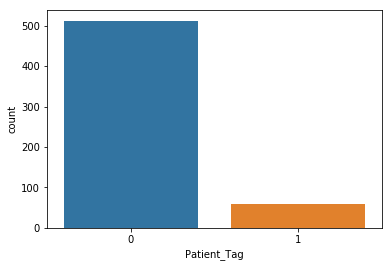

In [172]:
import seaborn as sns
sns.countplot(x='Patient_Tag',data=ans)

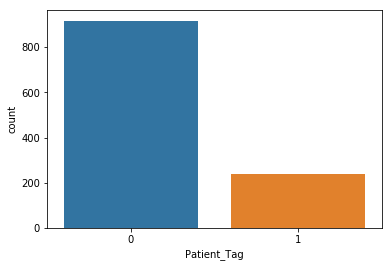

In [173]:
sns.countplot(x='Patient_Tag',data=train_df)

In [174]:
new_train_df['Patient_Tag'].value_counts()

0    916
1    240
Name: Patient_Tag, dtype: int64

In [175]:
train_df['Patient_Tag'].value_counts()

0    917
1    240
Name: Patient_Tag, dtype: int64

In [176]:
ans['Patient_Tag'].value_counts()

0    512
1     59
Name: Patient_Tag, dtype: int64

In [177]:
ans.to_csv('submission_4.csv',index=False)